Text(0, 0.5, 'Percent of Groups [%]')

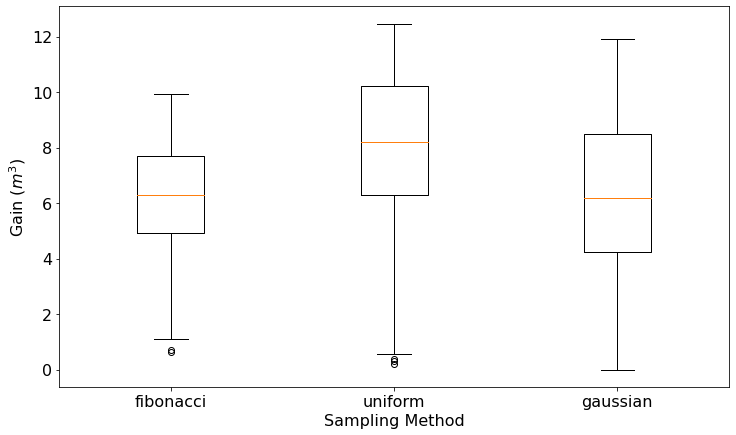

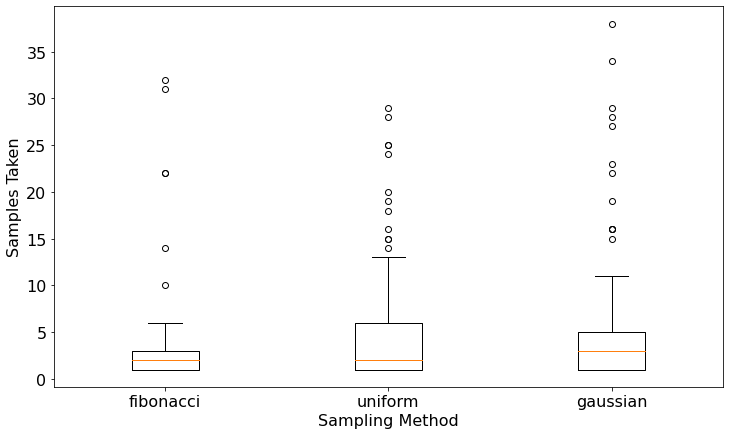

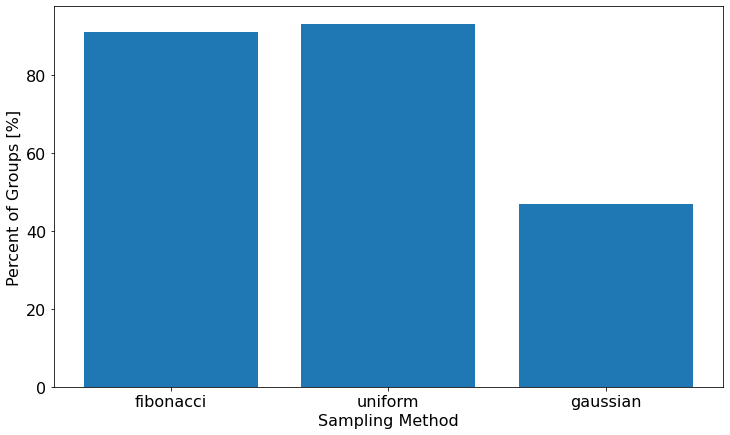

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import imageio

class Benchmark:
    def __init__(self):
        self.map_id = 0
        self.sampler = "fibonacci"
        self.sample_time = 0.0
        self.num_groups = 0
        self.gains = []
        self.samples = []
        return

def convert_csv_to_benchmarks(filename):
    benchmarks = []
    with open(filename, newline="\n") as csvfile:
        reader = csv.reader(csvfile, delimiter = ",")
        for row in reader:
            benchmark = Benchmark()
            benchmark.map_id = int(row[1])
            benchmark.sampler = row[2]
            benchmark.sample_time = float(row[3])
            benchmark.num_groups = int(row[4])
            samples_started = False
            for item in row[6:]:
                if (item == "samples"):
                    samples_started = True
                    continue
                if (samples_started):
                    benchmark.samples.append(int(item))
                else:
                    benchmark.gains.append(float(item))
            benchmarks.append(benchmark)
    return benchmarks


filename = "/home/andrew/Desktop/octomaps/goal_pose_sampling_benchmark_tunnel.csv"
benchmarks = convert_csv_to_benchmarks(filename)

# fig, ax = plt.subplots(figsize=[12.0, 7.0])
# ax.tick_params(axis='both', which='major', labelsize='16')
for i in range(14,15):
    gain_data = [benchmarks[3*i].gains, benchmarks[3*i+1].gains, benchmarks[3*i+2].gains]
    samples_data = [benchmarks[3*i].samples, benchmarks[3*i+1].samples, benchmarks[3*i+2].samples]
    labels = [benchmarks[3*i].sampler, benchmarks[3*i+1].sampler, benchmarks[3*i+2].sampler]
    percent_valid_goals = [(len(gain_data[0])/benchmarks[3*i].num_groups)*100.0, (len(gain_data[1])/benchmarks[3*i+1].num_groups)*100.0, (len(gain_data[2])/benchmarks[3*i+2].num_groups)*100.0]
    

fig, ax = plt.subplots(figsize=[12.0, 7.0])
ax.tick_params(axis='both', which='major', labelsize='16')
ax.boxplot(gain_data, labels=labels)
ax.set_xlabel('Sampling Method', fontsize="16")
ax.set_ylabel('Gain [$m^3$]', fontsize="16")

fig, ax = plt.subplots(figsize=[12.0, 7.0])
ax.tick_params(axis='both', which='major', labelsize='16')
ax.boxplot(samples_data, labels=labels)
ax.set_xlabel('Sampling Method', fontsize="16")
ax.set_ylabel('Samples Taken', fontsize="16")

fig, ax = plt.subplots(figsize=[12.0, 7.0])
ax.tick_params(axis='both', which='major', labelsize='16')
ax.bar(labels, percent_valid_goals)
ax.set_xlabel('Sampling Method', fontsize="16")
ax.set_ylabel('Percent of Groups [%]', fontsize="16")

